In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50463 stdev: 0.17289
Best fitness: 0.98154 - size: (2, 13) - species 4 - id 73
Average adjusted fitness: 0.412
Mean genetic distance 2.906, standard deviation 0.461
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 2.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59032 stdev: 0.18522
Best fitness: 0.98769 - size: (3, 14) - species 4 - id 364
Average adjusted fitness: 0.516
Mean genetic distance 3.011, standard deviation 0.474
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 1.583 sec (1.834 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62348 stdev: 0.20319
Best fitness: 0.98769 - size: (3, 14) - species 27 - id 364
Average adjusted fitness: 0.530
Mean genetic distance 3.010, standard deviation 0.469
Population of 203 members in 35 species
Total extinctio

Population of 193 members in 30 species
Total extinctions: 0
Generation time: 1.616 sec (1.494 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.77233 stdev: 0.19022
Best fitness: 0.99068 - size: (2, 13) - species 23 - id 535
Average adjusted fitness: 0.624
Mean genetic distance 3.099, standard deviation 0.532
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 1.952 sec (1.551 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.78818 stdev: 0.17793
Best fitness: 0.99068 - size: (2, 13) - species 23 - id 535
Average adjusted fitness: 0.424
Mean genetic distance 3.136, standard deviation 0.541
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 1.622 sec (1.559 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78448 stdev: 0.18783
Best fitness: 0.99689 - size: (3, 15) - species 23 - id 1536
Average adjusted fitness: 0.619
Mean genetic distance 3.129

Population's average fitness: 0.67292 stdev: 0.19842
Best fitness: 0.99388 - size: (5, 18) - species 31 - id 657
Average adjusted fitness: 0.642
Mean genetic distance 3.049, standard deviation 0.498
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 1.503 sec (1.573 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.72329 stdev: 0.17983
Best fitness: 0.99694 - size: (2, 14) - species 22 - id 1047
Average adjusted fitness: 0.616
Mean genetic distance 3.046, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 1.569 sec (1.573 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72083 stdev: 0.19971
Best fitness: 1.00000 - size: (2, 13) - species 22 - id 1185

Best individual in generation 7 meets fitness threshold - complexity: (2, 13)
Class1:0 #class1:162
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.51033 std

Population of 198 members in 28 species
Total extinctions: 0
Generation time: 1.721 sec (1.752 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76965 stdev: 0.21468
Best fitness: 1.00000 - size: (7, 21) - species 34 - id 3236

Best individual in generation 22 meets fitness threshold - complexity: (7, 21)
Class1:0 #class1:162
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.50452 stdev: 0.13591
Best fitness: 0.88037 - size: (2, 13) - species 4 - id 136
Average adjusted fitness: 0.413
Mean genetic distance 3.040, standard deviation 0.523
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.301 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57545 stdev: 0.16298
Best fitness: 0.94785 - size: (2, 13) - species 24 - id 333
Average adjusted fitness: 0.484
Mean genetic distance 3.078, standard deviation 0.529
Population of 198 members in 34 species
Total extinctions

Population's average fitness: 0.78550 stdev: 0.19292
Best fitness: 0.99693 - size: (9, 26) - species 13 - id 2603
Average adjusted fitness: 0.670
Mean genetic distance 3.257, standard deviation 0.504
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 2.153 sec (1.752 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.79736 stdev: 0.18627
Best fitness: 0.99693 - size: (9, 26) - species 13 - id 2603
Average adjusted fitness: 0.501
Mean genetic distance 3.285, standard deviation 0.496
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 2.318 sec (1.807 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77758 stdev: 0.19466
Best fitness: 0.99693 - size: (9, 26) - species 13 - id 2603
Average adjusted fitness: 0.581
Mean genetic distance 3.290, standard deviation 0.497
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 2.652 sec (1.897 average)

 ******

Population's average fitness: 0.51199 stdev: 0.16720
Best fitness: 0.97179 - size: (2, 13) - species 3 - id 84
Average adjusted fitness: 0.501
Mean genetic distance 2.907, standard deviation 0.475
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 1.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60064 stdev: 0.18707
Best fitness: 0.99373 - size: (3, 15) - species 7 - id 347
Average adjusted fitness: 0.443
Mean genetic distance 2.971, standard deviation 0.472
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 1.541 sec (1.463 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63679 stdev: 0.21770
Best fitness: 0.99373 - size: (3, 15) - species 24 - id 347
Average adjusted fitness: 0.542
Mean genetic distance 3.023, standard deviation 0.458
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 1.439 sec (1.455 average)

 ****** Running generation 3 **

Population's average fitness: 0.69106 stdev: 0.14845
Best fitness: 0.93808 - size: (3, 17) - species 20 - id 993
Average adjusted fitness: 0.410
Mean genetic distance 3.113, standard deviation 0.529
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 1.589 sec (1.415 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69762 stdev: 0.14845
Best fitness: 0.93808 - size: (3, 17) - species 20 - id 993
Average adjusted fitness: 0.409
Mean genetic distance 3.120, standard deviation 0.516
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 1.450 sec (1.436 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69260 stdev: 0.15767
Best fitness: 0.93808 - size: (3, 17) - species 20 - id 993
Average adjusted fitness: 0.470
Mean genetic distance 3.111, standard deviation 0.514
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 1.448 sec (1.456 average)

 ****** Ru

Population's average fitness: 0.60881 stdev: 0.14401
Best fitness: 0.89024 - size: (4, 17) - species 16 - id 417
Average adjusted fitness: 0.449
Mean genetic distance 3.027, standard deviation 0.477
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.503 sec (1.331 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61772 stdev: 0.14915
Best fitness: 0.89024 - size: (4, 17) - species 15 - id 417
Average adjusted fitness: 0.543
Mean genetic distance 3.088, standard deviation 0.485
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 1.713 sec (1.426 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62892 stdev: 0.14743
Best fitness: 0.91768 - size: (5, 18) - species 13 - id 814
Average adjusted fitness: 0.422
Mean genetic distance 3.084, standard deviation 0.504
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.470 sec (1.435 average)

 ****** Runn

Population's average fitness: 0.75666 stdev: 0.16413
Best fitness: 0.99085 - size: (5, 18) - species 37 - id 2666
Average adjusted fitness: 0.492
Mean genetic distance 3.205, standard deviation 0.507
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 1.731 sec (1.738 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75633 stdev: 0.16822
Best fitness: 0.99085 - size: (5, 18) - species 37 - id 2666
Average adjusted fitness: 0.507
Mean genetic distance 3.227, standard deviation 0.512
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 1.750 sec (1.754 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74971 stdev: 0.16685
Best fitness: 0.99085 - size: (5, 18) - species 37 - id 2666
Average adjusted fitness: 0.358
Mean genetic distance 3.200, standard deviation 0.527
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 1.757 sec (1.773 average)

 ******

Generation time: 1.658 sec (1.549 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73956 stdev: 0.16715
Best fitness: 0.96914 - size: (6, 18) - species 15 - id 2447
Average adjusted fitness: 0.522
Mean genetic distance 3.216, standard deviation 0.506
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 1.712 sec (1.573 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73829 stdev: 0.16232
Best fitness: 0.96914 - size: (6, 18) - species 15 - id 2447
Average adjusted fitness: 0.363
Mean genetic distance 3.202, standard deviation 0.515
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 1.496 sec (1.582 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74567 stdev: 0.15824
Best fitness: 0.96914 - size: (6, 18) - species 15 - id 2447
Average adjusted fitness: 0.343
Mean genetic distance 3.235, standard deviation 0.510
Population of 195 members in 

Total extinctions: 0
Generation time: 1.509 sec (1.420 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71921 stdev: 0.16606
Best fitness: 0.97554 - size: (6, 20) - species 27 - id 1084
Average adjusted fitness: 0.501
Mean genetic distance 3.047, standard deviation 0.510
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 1.515 sec (1.429 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69903 stdev: 0.16476
Best fitness: 0.97554 - size: (6, 20) - species 27 - id 1084
Average adjusted fitness: 0.415
Mean genetic distance 3.052, standard deviation 0.505
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 1.567 sec (1.425 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71700 stdev: 0.16287
Best fitness: 0.97554 - size: (6, 20) - species 27 - id 1084
Average adjusted fitness: 0.420
Mean genetic distance 3.068, standard deviation 0.509
Populatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50601 stdev: 0.14246
Best fitness: 0.96319 - size: (2, 13) - species 1 - id 5
Average adjusted fitness: 0.372
Mean genetic distance 2.940, standard deviation 0.500
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 1.137 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55264 stdev: 0.15300
Best fitness: 0.96626 - size: (2, 14) - species 2 - id 297
Average adjusted fitness: 0.469
Mean genetic distance 3.082, standard deviation 0.523
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 1.247 sec (1.192 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59662 stdev: 0.15724
Best fitness: 0.96626 - size: (2, 14) - species 19 - id 297
Average adjusted fitness: 0.371
Mean genetic distance 3.150, standard deviation 0.519
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 1.251 sec (1.212 ave

Population's average fitness: 0.74674 stdev: 0.16498
Best fitness: 0.98773 - size: (7, 22) - species 27 - id 2386
Average adjusted fitness: 0.314
Mean genetic distance 3.212, standard deviation 0.489
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 1.786 sec (1.842 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73903 stdev: 0.18532
Best fitness: 0.98773 - size: (7, 22) - species 27 - id 2386
Average adjusted fitness: 0.600
Mean genetic distance 3.247, standard deviation 0.502
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 1.866 sec (1.813 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.73123 stdev: 0.18375
Best fitness: 0.98773 - size: (7, 22) - species 27 - id 2386
Average adjusted fitness: 0.594
Mean genetic distance 3.247, standard deviation 0.495
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 2.090 sec (1.845 average)

 ******

Population's average fitness: 0.72552 stdev: 0.17376
Best fitness: 0.99690 - size: (11, 33) - species 32 - id 2347
Average adjusted fitness: 0.506
Mean genetic distance 3.130, standard deviation 0.504
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 1.999 sec (1.880 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73429 stdev: 0.17107
Best fitness: 0.99690 - size: (11, 33) - species 32 - id 2347
Average adjusted fitness: 0.461
Mean genetic distance 3.170, standard deviation 0.504
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 2.213 sec (1.911 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73060 stdev: 0.17973
Best fitness: 0.99690 - size: (11, 33) - species 32 - id 2347
Average adjusted fitness: 0.595
Mean genetic distance 3.135, standard deviation 0.509
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 1.892 sec (1.889 average)

 ***

Generation time: 1.391 sec (1.330 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60868 stdev: 0.11454
Best fitness: 0.84688 - size: (4, 17) - species 14 - id 715
Average adjusted fitness: 0.356
Mean genetic distance 3.133, standard deviation 0.494
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 1.428 sec (1.344 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62341 stdev: 0.11838
Best fitness: 0.88750 - size: (3, 15) - species 19 - id 1210
Average adjusted fitness: 0.266
Mean genetic distance 3.132, standard deviation 0.494
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 1.660 sec (1.384 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62209 stdev: 0.12264
Best fitness: 0.88750 - size: (3, 15) - species 19 - id 1210
Average adjusted fitness: 0.315
Mean genetic distance 3.108, standard deviation 0.491
Population of 201 members in 37 s

Population's average fitness: 0.67296 stdev: 0.14031
Best fitness: 0.90625 - size: (4, 17) - species 19 - id 1609
Average adjusted fitness: 0.340
Mean genetic distance 3.174, standard deviation 0.521
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 1.668 sec (1.865 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68819 stdev: 0.13233
Best fitness: 0.90625 - size: (4, 17) - species 19 - id 1609
Average adjusted fitness: 0.339
Mean genetic distance 3.201, standard deviation 0.522
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 1.697 sec (1.854 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.69015 stdev: 0.13443
Best fitness: 0.92812 - size: (4, 17) - species 28 - id 4470
Average adjusted fitness: 0.202
Mean genetic distance 3.167, standard deviation 0.522
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 1.850 sec (1.814 average)
Class1:1

Mean genetic distance 3.245, standard deviation 0.513
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 1.737 sec (1.711 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71485 stdev: 0.16056
Best fitness: 0.94462 - size: (5, 22) - species 30 - id 2901
Average adjusted fitness: 0.311
Mean genetic distance 3.235, standard deviation 0.519
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 1.635 sec (1.714 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72165 stdev: 0.16735
Best fitness: 0.94462 - size: (5, 22) - species 30 - id 2901
Average adjusted fitness: 0.504
Mean genetic distance 3.235, standard deviation 0.533
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 1.687 sec (1.711 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73457 stdev: 0.15340
Best fitness: 0.94462 - size: (5, 22) - species 30 - id 2901


Population of 203 members in 29 species
Total extinctions: 0
Generation time: 1.673 sec (1.563 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68412 stdev: 0.16989
Best fitness: 0.97231 - size: (5, 20) - species 16 - id 1582
Average adjusted fitness: 0.407
Mean genetic distance 3.048, standard deviation 0.505
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 1.679 sec (1.592 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69985 stdev: 0.16419
Best fitness: 0.97231 - size: (5, 20) - species 16 - id 1582
Average adjusted fitness: 0.512
Mean genetic distance 3.067, standard deviation 0.509
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.758 sec (1.624 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69549 stdev: 0.16563
Best fitness: 0.97231 - size: (5, 20) - species 16 - id 1582
Average adjusted fitness: 0.441
Mean genetic distance 

Generation time: 1.363 sec (1.333 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70453 stdev: 0.19640
Best fitness: 0.99688 - size: (2, 14) - species 5 - id 683
Average adjusted fitness: 0.526
Mean genetic distance 3.092, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 1.398 sec (1.346 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70889 stdev: 0.18756
Best fitness: 0.99688 - size: (2, 14) - species 5 - id 683
Average adjusted fitness: 0.641
Mean genetic distance 3.079, standard deviation 0.471
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.433 sec (1.361 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71355 stdev: 0.18496
Best fitness: 0.99688 - size: (2, 14) - species 5 - id 683
Average adjusted fitness: 0.440
Mean genetic distance 3.117, standard deviation 0.482
Population of 196 members in 34 specie

Population's average fitness: 0.79426 stdev: 0.19063
Best fitness: 0.99688 - size: (2, 14) - species 1 - id 683
Average adjusted fitness: 0.695
Mean genetic distance 3.134, standard deviation 0.549
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 1.811 sec (1.752 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.79101 stdev: 0.19892
Best fitness: 0.99688 - size: (2, 14) - species 1 - id 683
Average adjusted fitness: 0.613
Mean genetic distance 3.194, standard deviation 0.541
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 1.858 sec (1.772 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.79892 stdev: 0.19991
Best fitness: 0.99688 - size: (2, 14) - species 1 - id 683
Average adjusted fitness: 0.628
Mean genetic distance 3.190, standard deviation 0.558
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 1.865 sec (1.786 average)

 ****** Runni

Mean genetic distance 3.286, standard deviation 0.469
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 1.643 sec (1.679 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75169 stdev: 0.17732
Best fitness: 0.98457 - size: (4, 19) - species 1 - id 1585
Average adjusted fitness: 0.595
Mean genetic distance 3.270, standard deviation 0.478
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 1.823 sec (1.699 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74302 stdev: 0.17640
Best fitness: 0.98457 - size: (4, 19) - species 1 - id 1585
Average adjusted fitness: 0.409
Mean genetic distance 3.255, standard deviation 0.464
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 1.791 sec (1.717 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73997 stdev: 0.18241
Best fitness: 0.98457 - size: (4, 19) - species 1 - id 1585
Ave

Mean genetic distance 3.224, standard deviation 0.499
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 1.659 sec (1.517 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74639 stdev: 0.19231
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 1584
Average adjusted fitness: 0.572
Mean genetic distance 3.228, standard deviation 0.499
Population of 211 members in 37 species
Total extinctions: 0
Generation time: 1.693 sec (1.550 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.75041 stdev: 0.18041
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 1584
Average adjusted fitness: 0.379
Mean genetic distance 3.214, standard deviation 0.502
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 1.745 sec (1.574 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75644 stdev: 0.18732
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 1584
Ave

Mean genetic distance 3.176, standard deviation 0.497
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 1.468 sec (1.367 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71542 stdev: 0.17265
Best fitness: 0.99687 - size: (2, 14) - species 22 - id 703
Average adjusted fitness: 0.614
Mean genetic distance 3.191, standard deviation 0.502
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 1.508 sec (1.384 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71635 stdev: 0.17254
Best fitness: 0.99687 - size: (2, 14) - species 22 - id 703
Average adjusted fitness: 0.433
Mean genetic distance 3.200, standard deviation 0.497
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 1.522 sec (1.400 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72315 stdev: 0.16947
Best fitness: 0.99687 - size: (2, 14) - species 22 - id 703
Averag

Population's average fitness: 0.67410 stdev: 0.14903
Best fitness: 0.91167 - size: (6, 20) - species 38 - id 2192
Average adjusted fitness: 0.493
Mean genetic distance 3.268, standard deviation 0.500
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 1.699 sec (1.978 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68776 stdev: 0.13247
Best fitness: 0.94322 - size: (7, 23) - species 38 - id 2659
Average adjusted fitness: 0.293
Mean genetic distance 3.268, standard deviation 0.490
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 1.774 sec (1.980 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69598 stdev: 0.13268
Best fitness: 0.94322 - size: (7, 23) - species 38 - id 2659
Average adjusted fitness: 0.428
Mean genetic distance 3.301, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 1.782 sec (1.990 average)

 ******

Mean genetic distance 3.189, standard deviation 0.492
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 1.568 sec (1.493 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70589 stdev: 0.16395
Best fitness: 0.96584 - size: (4, 17) - species 36 - id 1648
Average adjusted fitness: 0.548
Mean genetic distance 3.168, standard deviation 0.489
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 1.784 sec (1.535 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70526 stdev: 0.17105
Best fitness: 0.96584 - size: (4, 17) - species 36 - id 1648
Average adjusted fitness: 0.600
Mean genetic distance 3.151, standard deviation 0.480
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 1.651 sec (1.562 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72064 stdev: 0.16635
Best fitness: 0.96584 - size: (4, 17) - species 36 - id 1648


Population's average fitness: 0.62937 stdev: 0.20080
Best fitness: 0.98773 - size: (3, 16) - species 4 - id 296
Average adjusted fitness: 0.520
Mean genetic distance 3.062, standard deviation 0.485
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 1.355 sec (1.290 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68260 stdev: 0.19040
Best fitness: 0.98773 - size: (3, 16) - species 16 - id 296
Average adjusted fitness: 0.438
Mean genetic distance 3.096, standard deviation 0.496
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.430 sec (1.325 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.72000 stdev: 0.19033
Best fitness: 0.98773 - size: (3, 16) - species 29 - id 296
Average adjusted fitness: 0.553
Mean genetic distance 3.098, standard deviation 0.511
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 1.518 sec (1.364 average)

 ****** Runni

Population of 200 members in 26 species
Total extinctions: 0
Generation time: 1.899 sec (1.724 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.81106 stdev: 0.18067
Best fitness: 0.99693 - size: (7, 24) - species 25 - id 2311
Average adjusted fitness: 0.501
Mean genetic distance 3.306, standard deviation 0.521
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 1.818 sec (1.741 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.81730 stdev: 0.18215
Best fitness: 0.99693 - size: (7, 24) - species 25 - id 2311
Average adjusted fitness: 0.678
Mean genetic distance 3.319, standard deviation 0.518
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 1.818 sec (1.759 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.78830 stdev: 0.20077
Best fitness: 0.99693 - size: (7, 24) - species 25 - id 2311
Average adjusted fitness: 0.688
Mean genetic distance 

Population's average fitness: 0.72477 stdev: 0.16784
Best fitness: 0.97872 - size: (5, 19) - species 16 - id 2488
Average adjusted fitness: 0.454
Mean genetic distance 3.219, standard deviation 0.505
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 1.741 sec (1.677 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72715 stdev: 0.16063
Best fitness: 0.97872 - size: (5, 19) - species 16 - id 2488
Average adjusted fitness: 0.376
Mean genetic distance 3.245, standard deviation 0.497
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 1.727 sec (1.688 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72686 stdev: 0.15522
Best fitness: 0.97872 - size: (5, 19) - species 16 - id 2488
Average adjusted fitness: 0.400
Mean genetic distance 3.243, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 1.734 sec (1.702 average)

 ******

Population's average fitness: 0.77605 stdev: 0.18046
Best fitness: 0.98171 - size: (4, 20) - species 2 - id 1329
Average adjusted fitness: 0.485
Mean genetic distance 3.170, standard deviation 0.493
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 1.645 sec (1.536 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74882 stdev: 0.20442
Best fitness: 0.98171 - size: (6, 22) - species 32 - id 1689
Average adjusted fitness: 0.630
Mean genetic distance 3.153, standard deviation 0.502
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 1.704 sec (1.564 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76949 stdev: 0.18179
Best fitness: 0.98171 - size: (6, 22) - species 32 - id 1689
Average adjusted fitness: 0.497
Mean genetic distance 3.176, standard deviation 0.494
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 1.622 sec (1.581 average)

 ****** 

Population's average fitness: 0.61751 stdev: 0.16689
Best fitness: 0.97846 - size: (2, 13) - species 3 - id 126
Average adjusted fitness: 0.523
Mean genetic distance 3.065, standard deviation 0.468
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 1.403 sec (1.317 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65087 stdev: 0.17458
Best fitness: 0.97846 - size: (2, 13) - species 3 - id 126
Average adjusted fitness: 0.413
Mean genetic distance 3.081, standard deviation 0.481
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 1.540 sec (1.373 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67709 stdev: 0.16714
Best fitness: 0.97846 - size: (2, 13) - species 3 - id 126
Average adjusted fitness: 0.477
Mean genetic distance 3.109, standard deviation 0.476
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 1.497 sec (1.398 average)

 ****** Running

Population's average fitness: 0.76527 stdev: 0.18341
Best fitness: 0.98154 - size: (5, 17) - species 35 - id 2855
Average adjusted fitness: 0.626
Mean genetic distance 3.296, standard deviation 0.508
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 1.856 sec (1.772 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76330 stdev: 0.18558
Best fitness: 0.98154 - size: (5, 17) - species 35 - id 2855
Average adjusted fitness: 0.445
Mean genetic distance 3.294, standard deviation 0.527
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 2.231 sec (1.819 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77312 stdev: 0.17019
Best fitness: 0.98154 - size: (5, 17) - species 35 - id 2855
Average adjusted fitness: 0.623
Mean genetic distance 3.290, standard deviation 0.533
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 1.804 sec (1.819 average)

 ******

Population's average fitness: 0.71628 stdev: 0.15362
Best fitness: 0.92857 - size: (6, 21) - species 14 - id 1516
Average adjusted fitness: 0.486
Mean genetic distance 3.204, standard deviation 0.514
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 1.639 sec (1.620 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70153 stdev: 0.15706
Best fitness: 0.92857 - size: (6, 21) - species 14 - id 1516
Average adjusted fitness: 0.467
Mean genetic distance 3.245, standard deviation 0.521
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 1.613 sec (1.630 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70809 stdev: 0.15075
Best fitness: 0.93789 - size: (4, 15) - species 35 - id 2546
Average adjusted fitness: 0.371
Mean genetic distance 3.251, standard deviation 0.517
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 1.697 sec (1.647 average)

 ******

Population of 196 members in 30 species
Total extinctions: 0
Generation time: 1.626 sec (1.459 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64918 stdev: 0.13436
Best fitness: 0.95413 - size: (5, 20) - species 22 - id 1260
Average adjusted fitness: 0.235
Mean genetic distance 3.032, standard deviation 0.480
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 1.529 sec (1.466 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65374 stdev: 0.13719
Best fitness: 0.95413 - size: (5, 20) - species 22 - id 1260
Average adjusted fitness: 0.302
Mean genetic distance 3.037, standard deviation 0.466
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 1.593 sec (1.499 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66437 stdev: 0.13463
Best fitness: 0.95413 - size: (5, 20) - species 22 - id 1260
Average adjusted fitness: 0.334
Mean genetic distance 3

Mean genetic distance 3.242, standard deviation 0.502
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 1.859 sec (1.864 average)
Class1:4 #class1:161
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.51011 stdev: 0.14398
Best fitness: 0.94154 - size: (2, 13) - species 2 - id 38
Average adjusted fitness: 0.438
Mean genetic distance 2.858, standard deviation 0.439
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 1.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59583 stdev: 0.14713
Best fitness: 0.94154 - size: (2, 13) - species 6 - id 38
Average adjusted fitness: 0.430
Mean genetic distance 3.006, standard deviation 0.458
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 1.372 sec (1.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62868 stdev: 0.16980
Best fitness: 0.96615 - size: (3, 15) - spec

Mean genetic distance 3.206, standard deviation 0.493
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 1.795 sec (1.673 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.77089 stdev: 0.17754
Best fitness: 0.97846 - size: (5, 18) - species 26 - id 3152
Average adjusted fitness: 0.342
Mean genetic distance 3.226, standard deviation 0.489
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 1.697 sec (1.670 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77676 stdev: 0.17657
Best fitness: 0.97846 - size: (5, 18) - species 26 - id 3152
Average adjusted fitness: 0.586
Mean genetic distance 3.238, standard deviation 0.506
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 1.704 sec (1.673 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76154 stdev: 0.18256
Best fitness: 0.97846 - size: (8, 24) - species 15 - id 3588


Mean genetic distance 3.144, standard deviation 0.487
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 1.749 sec (1.595 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74748 stdev: 0.18586
Best fitness: 0.97840 - size: (5, 21) - species 1 - id 1678
Average adjusted fitness: 0.520
Mean genetic distance 3.139, standard deviation 0.493
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 1.634 sec (1.600 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73214 stdev: 0.18659
Best fitness: 0.97840 - size: (5, 21) - species 1 - id 1678
Average adjusted fitness: 0.403
Mean genetic distance 3.139, standard deviation 0.495
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 1.671 sec (1.616 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73527 stdev: 0.18796
Best fitness: 0.98148 - size: (7, 23) - species 29 - id 2642
Av


 ****** Running generation 6 ****** 

Population's average fitness: 0.68931 stdev: 0.17221
Best fitness: 0.96885 - size: (4, 15) - species 20 - id 640
Average adjusted fitness: 0.495
Mean genetic distance 3.091, standard deviation 0.498
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 1.439 sec (1.424 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70762 stdev: 0.16622
Best fitness: 0.97508 - size: (4, 20) - species 13 - id 1280
Average adjusted fitness: 0.427
Mean genetic distance 3.120, standard deviation 0.510
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 1.543 sec (1.439 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72044 stdev: 0.16522
Best fitness: 0.97508 - size: (4, 20) - species 13 - id 1280
Average adjusted fitness: 0.595
Mean genetic distance 3.157, standard deviation 0.526
Population of 197 members in 27 species
Total extinctions: 0
Generation time

Generation time: 1.891 sec (1.760 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76873 stdev: 0.17613
Best fitness: 0.99377 - size: (8, 24) - species 15 - id 3802
Average adjusted fitness: 0.383
Mean genetic distance 3.260, standard deviation 0.552
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 1.853 sec (1.774 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77239 stdev: 0.17728
Best fitness: 0.99688 - size: (9, 28) - species 22 - id 4705
Average adjusted fitness: 0.469
Mean genetic distance 3.256, standard deviation 0.555
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 1.817 sec (1.781 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75118 stdev: 0.18251
Best fitness: 0.99688 - size: (9, 28) - species 22 - id 4705
Average adjusted fitness: 0.572
Mean genetic distance 3.254, standard deviation 0.563
Population of 197 members in 

Mean genetic distance 3.216, standard deviation 0.504
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 1.714 sec (1.670 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73264 stdev: 0.17553
Best fitness: 0.96855 - size: (6, 19) - species 5 - id 2147
Average adjusted fitness: 0.638
Mean genetic distance 3.230, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 1.789 sec (1.685 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74456 stdev: 0.17575
Best fitness: 0.96855 - size: (6, 19) - species 5 - id 2147
Average adjusted fitness: 0.471
Mean genetic distance 3.202, standard deviation 0.526
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 1.722 sec (1.702 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.72985 stdev: 0.17220
Best fitness: 0.96855 - size: (6, 19) - species 5 - id 2147
Ave

Mean genetic distance 3.202, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 1.652 sec (1.578 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72531 stdev: 0.18709
Best fitness: 0.97833 - size: (5, 18) - species 22 - id 1813
Average adjusted fitness: 0.563
Mean genetic distance 3.200, standard deviation 0.470
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 1.726 sec (1.604 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.75119 stdev: 0.17413
Best fitness: 0.97833 - size: (5, 18) - species 22 - id 1813
Average adjusted fitness: 0.512
Mean genetic distance 3.186, standard deviation 0.466
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 1.668 sec (1.622 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.77464 stdev: 0.15838
Best fitness: 0.97833 - size: (5, 18) - species 22 - id 1813


Mean genetic distance 3.130, standard deviation 0.514
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 1.471 sec (1.348 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63735 stdev: 0.16803
Best fitness: 0.96024 - size: (3, 17) - species 22 - id 520
Average adjusted fitness: 0.511
Mean genetic distance 3.162, standard deviation 0.543
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.442 sec (1.367 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66332 stdev: 0.16583
Best fitness: 0.96024 - size: (3, 17) - species 22 - id 520
Average adjusted fitness: 0.588
Mean genetic distance 3.194, standard deviation 0.530
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 1.491 sec (1.388 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.68475 stdev: 0.17314
Best fitness: 0.96330 - size: (4, 19) - species 20 - id 1108
Avera

Population's average fitness: 0.65802 stdev: 0.16939
Best fitness: 0.97531 - size: (4, 17) - species 17 - id 1124
Average adjusted fitness: 0.421
Mean genetic distance 3.149, standard deviation 0.515
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 1.579 sec (1.425 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68328 stdev: 0.17033
Best fitness: 0.97531 - size: (4, 17) - species 17 - id 1124
Average adjusted fitness: 0.501
Mean genetic distance 3.167, standard deviation 0.512
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 1.576 sec (1.444 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67924 stdev: 0.16798
Best fitness: 0.97531 - size: (4, 17) - species 17 - id 1124
Average adjusted fitness: 0.456
Mean genetic distance 3.172, standard deviation 0.514
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 1.640 sec (1.465 average)

 ****** R


 ****** Running generation 30 ****** 

Population's average fitness: 0.73582 stdev: 0.18694
Best fitness: 0.98457 - size: (6, 22) - species 17 - id 4311
Average adjusted fitness: 0.649
Mean genetic distance 3.170, standard deviation 0.535
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 1.777 sec (1.852 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76286 stdev: 0.17597
Best fitness: 0.98457 - size: (6, 22) - species 17 - id 4311
Average adjusted fitness: 0.406
Mean genetic distance 3.213, standard deviation 0.538
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 1.822 sec (1.853 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75981 stdev: 0.17135
Best fitness: 0.98457 - size: (6, 22) - species 17 - id 4311
Average adjusted fitness: 0.425
Mean genetic distance 3.191, standard deviation 0.543
Population of 191 members in 22 species
Total extinctions: 0
Generation 

Total extinctions: 0
Generation time: 1.754 sec (1.689 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72107 stdev: 0.16667
Best fitness: 0.95639 - size: (8, 26) - species 43 - id 2585
Average adjusted fitness: 0.373
Mean genetic distance 3.306, standard deviation 0.511
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 1.765 sec (1.707 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71102 stdev: 0.17238
Best fitness: 0.95950 - size: (4, 16) - species 2 - id 2831
Average adjusted fitness: 0.413
Mean genetic distance 3.296, standard deviation 0.522
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 1.653 sec (1.702 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71530 stdev: 0.16917
Best fitness: 0.95950 - size: (4, 16) - species 2 - id 2831
Average adjusted fitness: 0.320
Mean genetic distance 3.310, standard deviation 0.523
Population

Population's average fitness: 0.70877 stdev: 0.16838
Best fitness: 0.97853 - size: (4, 18) - species 18 - id 1605
Average adjusted fitness: 0.359
Mean genetic distance 3.126, standard deviation 0.482
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 1.718 sec (1.581 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73109 stdev: 0.15670
Best fitness: 0.97853 - size: (4, 18) - species 18 - id 1605
Average adjusted fitness: 0.335
Mean genetic distance 3.129, standard deviation 0.486
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 1.611 sec (1.601 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71408 stdev: 0.17505
Best fitness: 0.97853 - size: (5, 16) - species 29 - id 2070
Average adjusted fitness: 0.462
Mean genetic distance 3.153, standard deviation 0.479
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 1.624 sec (1.619 average)

 ******

Population's average fitness: 0.66967 stdev: 0.18347
Best fitness: 0.99690 - size: (3, 15) - species 2 - id 672
Average adjusted fitness: 0.653
Mean genetic distance 3.003, standard deviation 0.467
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 1.410 sec (1.355 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71747 stdev: 0.20216
Best fitness: 0.99690 - size: (3, 15) - species 2 - id 672
Average adjusted fitness: 0.546
Mean genetic distance 3.046, standard deviation 0.475
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.895 sec (1.463 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.73708 stdev: 0.19996
Best fitness: 0.99690 - size: (2, 13) - species 26 - id 924
Average adjusted fitness: 0.600
Mean genetic distance 3.081, standard deviation 0.473
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 1.559 sec (1.479 average)

 ****** Runnin

Mean genetic distance 3.141, standard deviation 0.509
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 1.710 sec (1.652 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75002 stdev: 0.17750
Best fitness: 0.98438 - size: (7, 23) - species 1 - id 1712
Average adjusted fitness: 0.436
Mean genetic distance 3.151, standard deviation 0.505
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 1.797 sec (1.676 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73404 stdev: 0.18096
Best fitness: 0.98438 - size: (7, 23) - species 1 - id 1712
Average adjusted fitness: 0.534
Mean genetic distance 3.159, standard deviation 0.512
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 1.710 sec (1.687 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73577 stdev: 0.18571
Best fitness: 0.98438 - size: (7, 23) - species 1 - id 1712
Ave


Population's average fitness: 0.60204 stdev: 0.13757
Best fitness: 0.95584 - size: (4, 15) - species 14 - id 483
Average adjusted fitness: 0.444
Mean genetic distance 3.016, standard deviation 0.492
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 1.401 sec (1.274 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62125 stdev: 0.13661
Best fitness: 0.95584 - size: (4, 15) - species 13 - id 483
Average adjusted fitness: 0.360
Mean genetic distance 3.064, standard deviation 0.517
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 1.417 sec (1.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65304 stdev: 0.14557
Best fitness: 0.95584 - size: (4, 15) - species 13 - id 483
Average adjusted fitness: 0.305
Mean genetic distance 3.056, standard deviation 0.551
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 1.462 sec (1.340 average)

 ****** Run

Population's average fitness: 0.75815 stdev: 0.17040
Best fitness: 0.98423 - size: (4, 15) - species 31 - id 3429
Average adjusted fitness: 0.434
Mean genetic distance 3.260, standard deviation 0.516
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 1.831 sec (1.761 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75792 stdev: 0.17610
Best fitness: 0.98423 - size: (4, 15) - species 31 - id 3429
Average adjusted fitness: 0.537
Mean genetic distance 3.261, standard deviation 0.515
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 1.712 sec (1.759 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74946 stdev: 0.17330
Best fitness: 0.98423 - size: (4, 15) - species 31 - id 3429
Average adjusted fitness: 0.400
Mean genetic distance 3.272, standard deviation 0.537
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 1.776 sec (1.774 average)

 ******

Population's average fitness: 0.76412 stdev: 0.16804
Best fitness: 0.96584 - size: (8, 29) - species 11 - id 2269
Average adjusted fitness: 0.432
Mean genetic distance 3.201, standard deviation 0.499
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 1.720 sec (1.649 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76916 stdev: 0.16907
Best fitness: 0.96584 - size: (8, 29) - species 11 - id 2269
Average adjusted fitness: 0.541
Mean genetic distance 3.193, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 1.715 sec (1.662 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.76183 stdev: 0.18102
Best fitness: 0.96584 - size: (8, 29) - species 11 - id 2269
Average adjusted fitness: 0.677
Mean genetic distance 3.204, standard deviation 0.486
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.794 sec (1.691 average)

 ******

Population's average fitness: 0.66362 stdev: 0.15249
Best fitness: 0.91850 - size: (3, 14) - species 2 - id 965
Average adjusted fitness: 0.480
Mean genetic distance 3.081, standard deviation 0.460
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 1.538 sec (1.439 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67061 stdev: 0.13967
Best fitness: 0.92476 - size: (5, 16) - species 9 - id 1485
Average adjusted fitness: 0.291
Mean genetic distance 3.088, standard deviation 0.453
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 1.669 sec (1.462 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68495 stdev: 0.14448
Best fitness: 0.92476 - size: (5, 16) - species 9 - id 1485
Average adjusted fitness: 0.411
Mean genetic distance 3.090, standard deviation 0.461
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 1.552 sec (1.502 average)

 ****** Runn

Population's average fitness: 0.73731 stdev: 0.15702
Best fitness: 0.94984 - size: (8, 28) - species 24 - id 4595
Average adjusted fitness: 0.412
Mean genetic distance 3.224, standard deviation 0.516
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 1.882 sec (1.746 average)


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [36]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
    
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Accuracy on training set: {}".format(np.sum(list_P == digits.target[1617:])/180))

Accuracy on training set: 0.8777777777777778


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  1  1  0  1  0  1  0]
 [ 0  0 17  0  0  0  0  0  1  0]
 [ 0  0  0 10  0  0  0  0  1  0]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  1  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  2  0  0 19  0  2]
 [ 0  4  0  4  0  0  1  0 14  1]
 [ 0  0  0  2  0  0  0  0  0 15]]


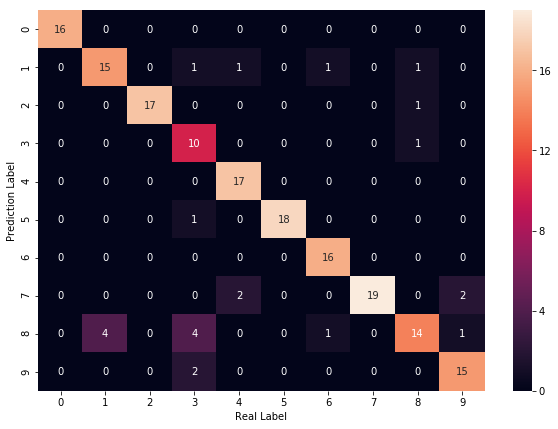

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [61]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[:1617])/1617

0.9325912183055041

In [62]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.9840795527180888

In [58]:
list_acc = []


for iii in range(45):
    # 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
    pred_value = []
    error_list = []
    for j in range(1617,1617+180):
        pred = []
        vote = [0,0,0,0,0,0,0,0,0,0]
        for i in range(iii):

            pred_outputs = get_pred_real(i, j)
            #print(i,classes[i],pred_outputs[0][0])

            vote_for = classes[i][1 - pred_outputs[0]]
            vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
        pred_value.append(np.where(vote==np.max(vote)))        
        #print(np.array(pred).T)

    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07222222222222222
Accuracy on training set: 0.19444444444444445
Accuracy on training set: 0.20555555555555555
Accuracy on training set: 0.16111111111111112
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.2
Accuracy on training set: 0.15
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.18333333333333332
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.25555555555555554
Accuracy on training set: 0.25
Accuracy on training set: 0.2111111111111111
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.24444444444444444
Accuracy on training set: 0.25
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.32222222222222224
Accuracy on training set: 0.32222222222222224
Accura

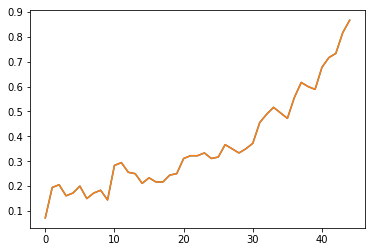

In [60]:
plt.plot(range(45),list_acc)
plt.show()

In [63]:
list_acc

[0.07222222222222222,
 0.19444444444444445,
 0.20555555555555555,
 0.16111111111111112,
 0.17222222222222222,
 0.2,
 0.15,
 0.17222222222222222,
 0.18333333333333332,
 0.14444444444444443,
 0.2833333333333333,
 0.29444444444444445,
 0.25555555555555554,
 0.25,
 0.2111111111111111,
 0.23333333333333334,
 0.21666666666666667,
 0.21666666666666667,
 0.24444444444444444,
 0.25,
 0.3111111111111111,
 0.32222222222222224,
 0.32222222222222224,
 0.3333333333333333,
 0.3111111111111111,
 0.31666666666666665,
 0.36666666666666664,
 0.35,
 0.3333333333333333,
 0.35,
 0.37222222222222223,
 0.45555555555555555,
 0.4888888888888889,
 0.5166666666666667,
 0.49444444444444446,
 0.4722222222222222,
 0.5555555555555556,
 0.6166666666666667,
 0.6,
 0.5888888888888889,
 0.6777777777777778,
 0.7166666666666667,
 0.7333333333333333,
 0.8166666666666667,
 0.8666666666666667]